# Documentation - Test Results

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dt = pd.read_csv("/Users/adrianjaucian/Capstone/Outputs/decision_tree_results.csv")
knn = pd.read_csv("/Users/adrianjaucian/Capstone/Outputs/knn_results.csv")
logr = pd.read_csv("/Users/adrianjaucian/Capstone/Outputs/logistic_regression_results.csv")
svm = pd.read_csv("/Users/adrianjaucian/Capstone/Outputs/svm_results.csv")

In [6]:
dt.columns

Index(['DATASET', 'BOT_FOLDERS', 'BOT_RATIO', 'MERGED_DATASET',
       'TYPE_SELECTION', 'TRAIN_RATE', 'TEST_RATE', 'VAL_RATE', 'MODEL',
       'FEATURES', 'test_Accuracy', 'test_TN Rate', 'test_FP Rate',
       'test_FN Rate', 'test_TP Rate', 'test_Precision', 'test_Recall',
       'test_F1 Score', 'test_MCC', 'test_AUC', 'val_Accuracy', 'val_TN Rate',
       'val_FP Rate', 'val_FN Rate', 'val_TP Rate', 'val_Precision',
       'val_Recall', 'val_F1 Score', 'val_MCC', 'val_AUC', 'ccp_alpha',
       'class_weight', 'criterion', 'max_depth', 'max_features',
       'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf',
       'min_samples_split', 'min_weight_fraction_leaf', 'random_state',
       'splitter'],
      dtype='object')

<Figure size 10000x6000 with 0 Axes>

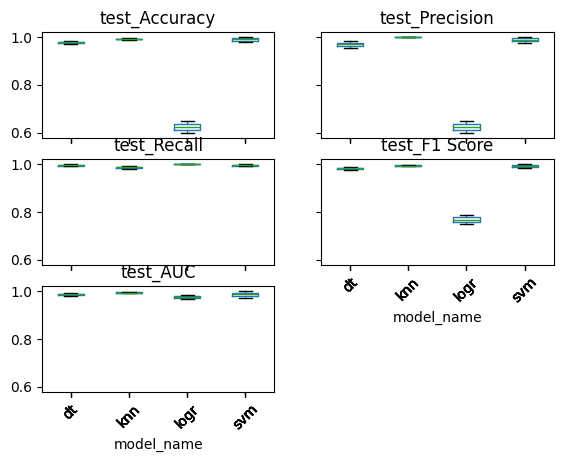

In [10]:
models = {'dt': dt, 'knn': knn, 'logr': logr, 'svm': svm}

# Concatenate all DataFrames into one DataFrame and add a column for model names
all_models = pd.concat([model.assign(model_name=name) for name, model in models.items()], ignore_index=True)

# Extract relevant columns for comparison
metrics_columns = ['test_Accuracy', 'test_Precision', 'test_Recall', 'test_F1 Score', 'test_AUC']

# Box plot for comparison
plt.figure(figsize=(100, 60))
boxplot = all_models.boxplot(column=metrics_columns, by='model_name', grid=False, rot=45)
plt.title('Comparison of Key Performance Metrics by Model')
plt.ylabel('Metric Score')
plt.xlabel('Model')
plt.suptitle('')
plt.show()


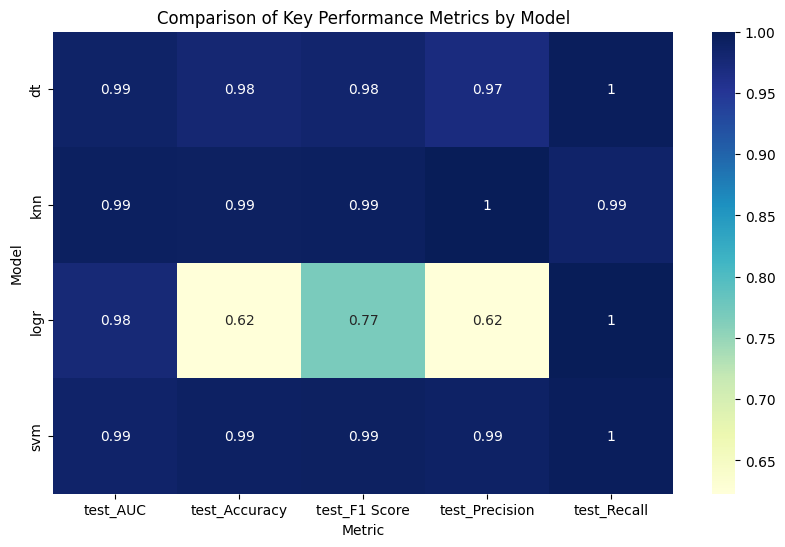

In [14]:
# Pivot the DataFrame to create a matrix of metric scores
pivot_df = all_models.pivot_table(index='model_name', values=metrics_columns)

# Heatmap for comparison
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu')
plt.title('Comparison of Key Performance Metrics by Model')
plt.xlabel('Metric')
plt.ylabel('Model')
plt.show()